#### 1. Data Cleaning and Preprocessing:

In [1]:
# Import necessary libraries like pandas, matplotlib, seaborn, and scipy.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Text(0, 0.5, 'Value')

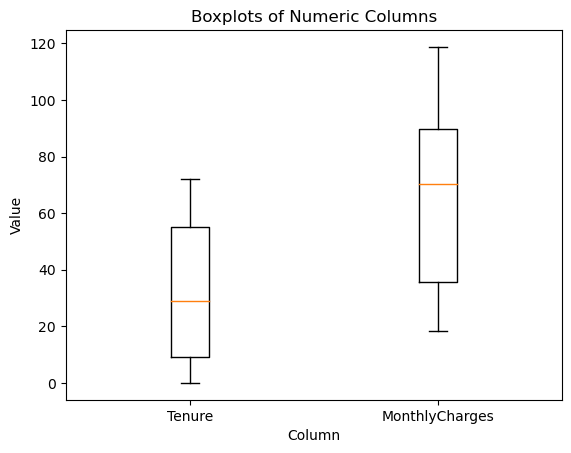

In [3]:
# Read the dataset 'Telco_Customer_Churn.csv' into a DataFrame.
df = pd.read_csv('Telco_Customer_Churn.csv')

# Drop duplicate rows from the DataFrame.
df = df.drop_duplicates()

# convert the 'TotalCharges' column to numeric, handling errors with 'coerce.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# drop rows with missing values
df.dropna()

#### 2. Check for outliers:

Text(0.5, 1.0, 'Boxplots for Tenure and Monthly Charges Columns')

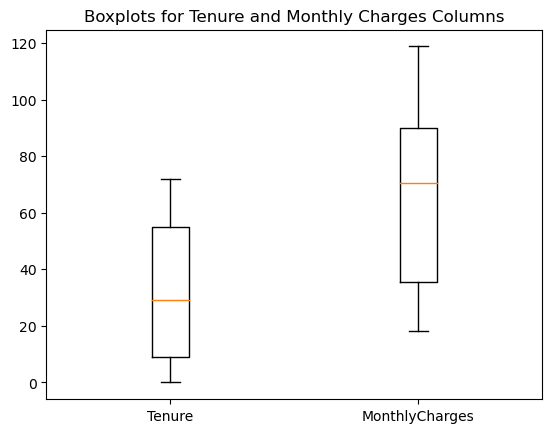

In [24]:
# Identify numeric columns in the DataFrame.
df.select_dtypes(include='number').columns

# Define the numeric columns
numeric_columns = [df['tenure'], df['MonthlyCharges']]

# Create boxplots for the numeric columns
plt.boxplot(numeric_columns)

# Add x-axis labels
plt.xticks([1, 2], ['Tenure', 'MonthlyCharges'])

# Add a title and labels
plt.title('Boxplots for Tenure and Monthly Charges Columns')

Text(0.5, 1.0, 'Boxplots for Total Charges Column')

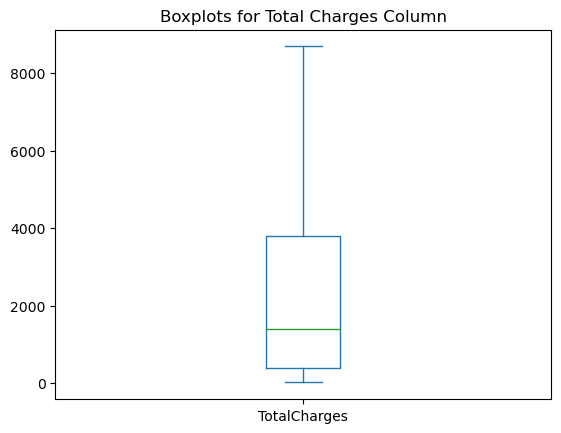

In [26]:
df['TotalCharges'].plot(kind = 'box')

# Add a title and labels
plt.title('Boxplots for Total Charges Column')

There were no outliers in the numeric columns of the data frame

#### 3. Filtering Rows:

In [28]:
# Filter rows where the specified columns contain 'Yes' or 'No'
yes_no_filter = df.loc[(df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].isin(['Yes', 'No'])).all(axis=1)]

# Filter rows where 'gender' is 'Male' or 'Female'
male_female_filter = yes_no_filter[yes_no_filter['gender'].isin(['Male', 'Female'])]

# Filter rows where other columns contain 'Yes', 'No', or 'No internet service'
other_columns = ['DeviceProtection', 'StreamingMovies', 'StreamingMovies', 'OnlineSecurity', 'StreamingTV', 'TechSupport']
yes_no_internet_filter = male_female_filter[
    ((male_female_filter[other_columns] == 'Yes').any(axis=1))
    | ((male_female_filter[other_columns] == 'No').any(axis=1))
    | ((male_female_filter[other_columns] == 'No internet service').any(axis=1))
]

# Update the DataFrame with the final filtered result
df = yes_no_internet_filter

#### 4. Summary Statistics:

In [8]:
# Summary statistics of the numeric columns in the dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### 5. Data Visualization:

Male      3555
Female    3488
Name: gender, dtype: int64

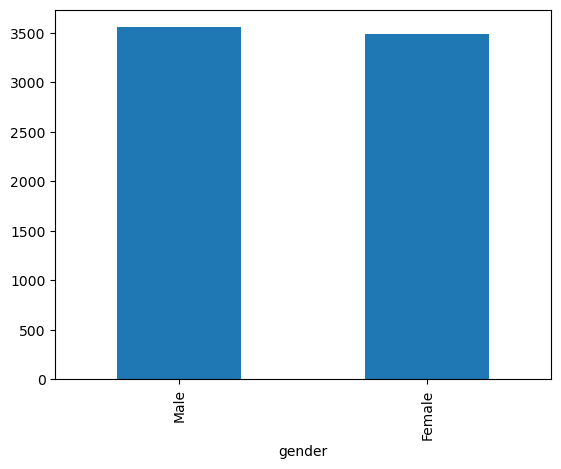

In [29]:
# Bar chart to display the gender distribution of customers

gender = df['gender'].value_counts()
gender.plot(kind='bar', xlabel='gender')
gender

No     3641
Yes    3402
Name: Partner, dtype: int64

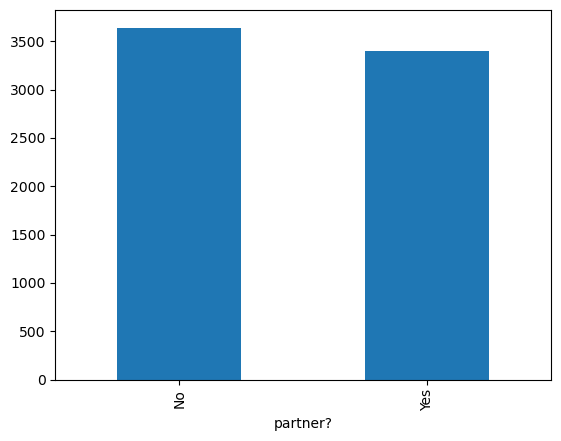

In [30]:
# Bar chart to display the partner distribution of customers
partner = df['Partner'].value_counts()
partner.plot(kind='bar', xlabel='partner?')
partner


No     4933
Yes    2110
Name: Dependents, dtype: int64

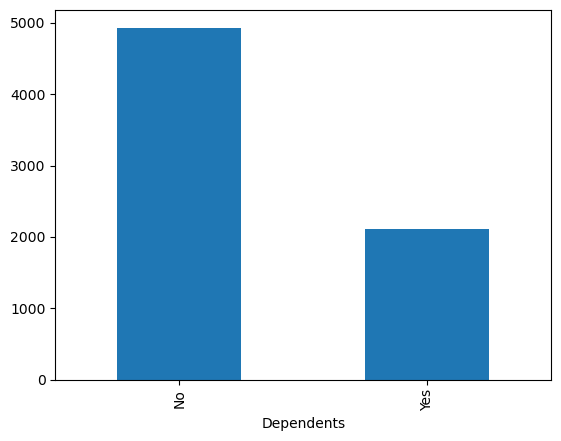

In [32]:
# Bar chart to display the dependents distribution of customers
dependents = df['Dependents'].value_counts()
dependents.plot(kind='bar', xlabel='Dependents')
dependents

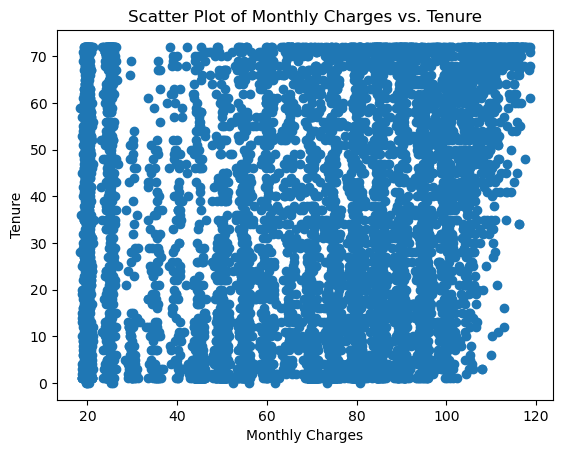

There seems to be little to ni significant correlation between Tenure and monthly charges


In [52]:
# Scatter plots to explore the relationship between monthly charges and tenure.
plt.scatter(df['MonthlyCharges'], df['tenure'])
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.title('Scatter Plot of Monthly Charges vs. Tenure')
plt.show()
print('There seems to be little to ni significant correlation between Tenure and monthly charges')

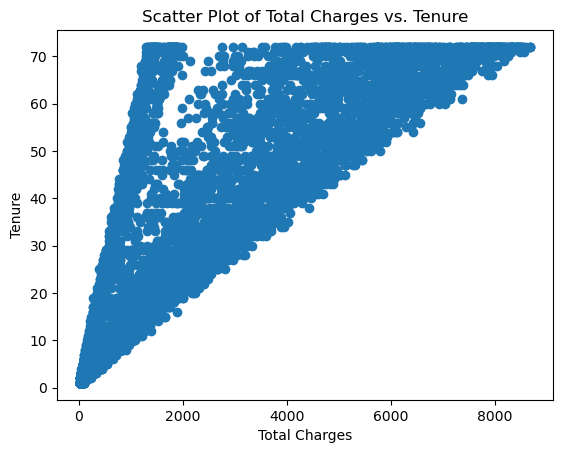

There is a significant positive correlation between Tenure and Total charges. That is, the higher the tenure, the higher the total charges


In [53]:
#Scatter plots to explore the relationship between total charges and tenure.

plt.scatter(df['TotalCharges'], df['tenure'])
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Scatter Plot of Total Charges vs. Tenure')
plt.show()

print('There is a significant positive correlation between Tenure and Total charges. That is, the higher the tenure, the higher the total charges')

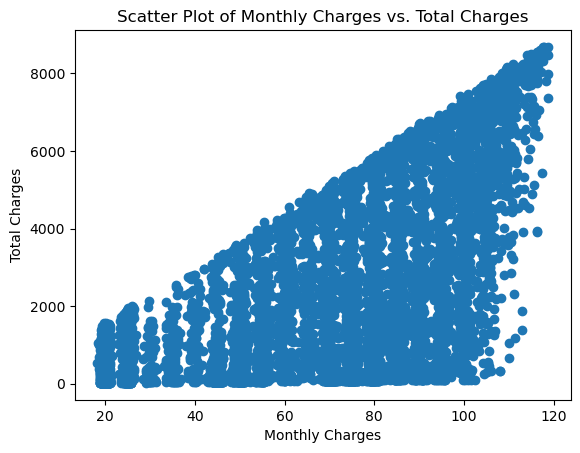

In [35]:
# Scatter plots to explore the relationship between monthly charges and total charges.

plt.scatter(df['MonthlyCharges'], df['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Monthly Charges vs. Total Charges')
plt.show()
print('There is a significant negative correlation between Total charges and Monthly charges. That is, the higher the total charges, the lower the monthly charges')

#### 6. Hypothesis Testing (t-tests):

In [37]:
#Independent t-tests to compare differences in Tenure

# Split data into two groups: Churn and Non-Churn
churn_tenure = df[df['Churn'] == 'Yes']['tenure']
non_churn_tenure = df[df['Churn'] == 'No']['tenure']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(churn_tenure, non_churn_tenure)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is a statistically significant difference between Churn and Non-Churn groups for Tenure.")
else:
    print("There is no statistically significant difference between Churn and Non-Churn groups for Tenure.")
    
# Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

There is a statistically significant difference between Churn and Non-Churn groups for Tenure.
t-statistic: -31.57955051135377
p-value: 7.99905796059022e-205


In [17]:
#  Independent t-tests to compare differences in Monthly Charges

# Split data into two groups: Churn and Non-Churn
churn_group = df[df['Churn'] == 'Yes']['MonthlyCharges']
non_churn_group = df[df['Churn'] == 'No']['MonthlyCharges']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(churn_group, non_churn_group)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is a statistically significant difference between Churn and Non-Churn groups for Monthly Charges.")
else:
    print("There is no statistically significant difference between Churn and Non-Churn groups for Monthly Charges.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")



There is a statistically significant difference between Churn and Non-Churn groups for Monthly Charges.
t-statistic: 16.536738015936308
p-value: 2.7066456068884154e-60


In [19]:
# Independent t-tests to compare differences in Total Charges

# Split data into two groups: Churn and Non-Churn
churn_group = df[df['Churn'] == 'Yes']['TotalCharges']
non_churn_group = df[df['Churn'] == 'No']['TotalCharges']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(churn_group, non_churn_group)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is a statistically significant difference between Churn and Non-Churn groups for Total Charges.")
else:
    print("There is no statistically significant difference between Churn and Non-Churn groups for Total Charges.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


There is no statistically significant difference between Churn and Non-Churn groups for Total Charges.
t-statistic: nan
p-value: nan


#### 7. Summary statistics for each PaymentMethod segment:

In [49]:
# Calculate summary statistics for each segment by PaymentMethod
summary_statistics = df.groupby('PaymentMethod')[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].agg(['count', 'mean', 'median', 'std'])

# Print the summary statistics for each PaymentMethod segment
print(summary_statistics)

                          SeniorCitizen                            tenure  \
                                  count      mean median       std  count   
PaymentMethod                                                               
Bank transfer (automatic)          1544  0.150907    0.0  0.358074   1544   
Credit card (automatic)            1522  0.145204    0.0  0.352422   1522   
Electronic check                   2365  0.251163    0.0  0.433774   2365   
Mailed check                       1612  0.058313    0.0  0.234406   1612   

                                                       MonthlyCharges  \
                                mean median        std          count   
PaymentMethod                                                           
Bank transfer (automatic)  43.656736   48.0  23.197901           1544   
Credit card (automatic)    43.269382   47.0  23.339581           1522   
Electronic check           25.174630   18.0  22.382301           2365   
Mailed check          